# Build LLM Agent with MCP from scratch

### 1. Build a local MCP server ###

## First, install (copy to terminal and install) via https://nodejs.org/en/download

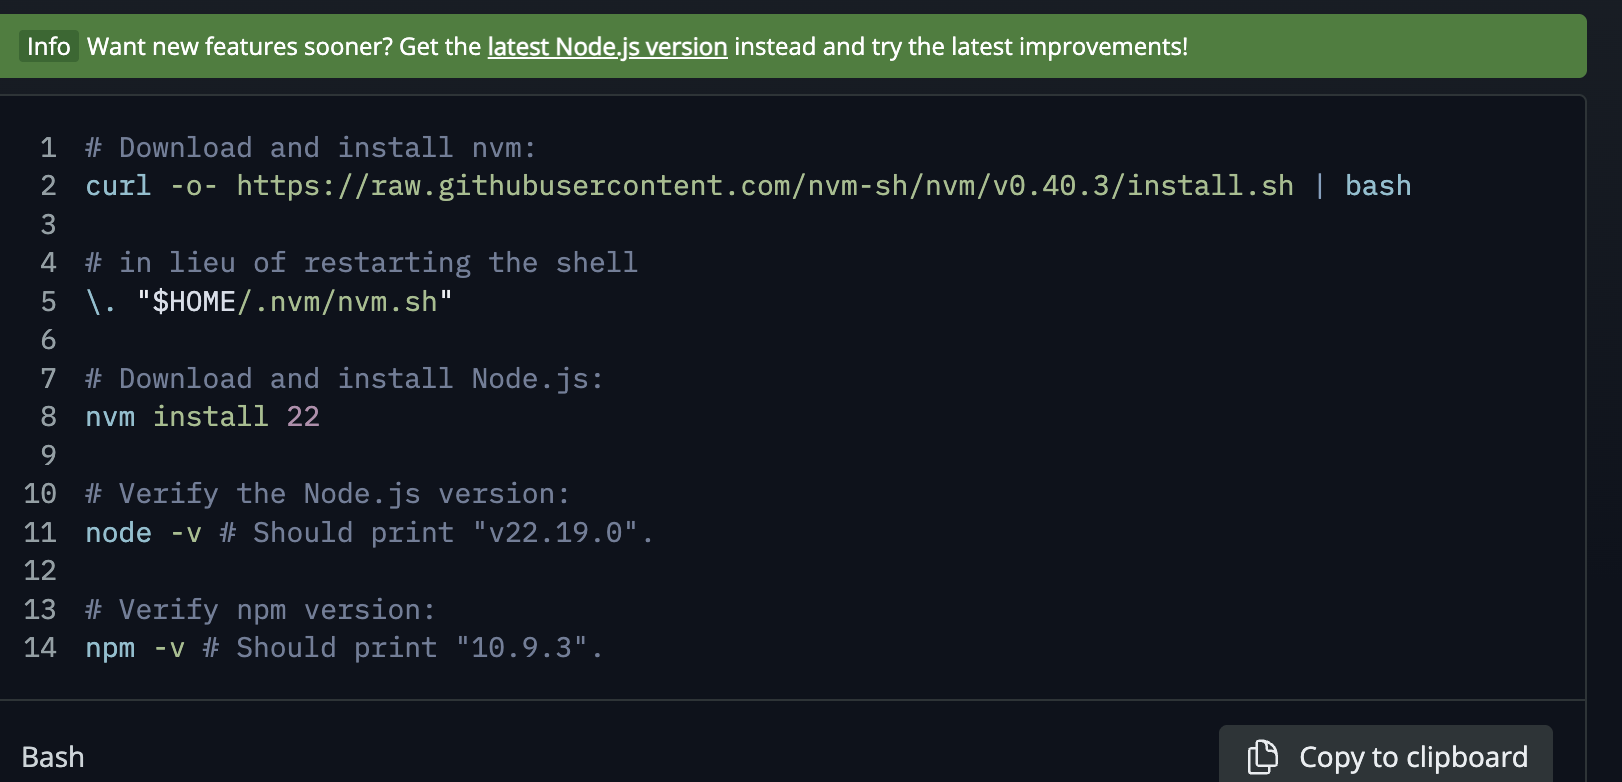

After you finish this do test with the command: ```npx @modelcontextprotocol/inspector node build/index.js```  And you'll get the following interface.

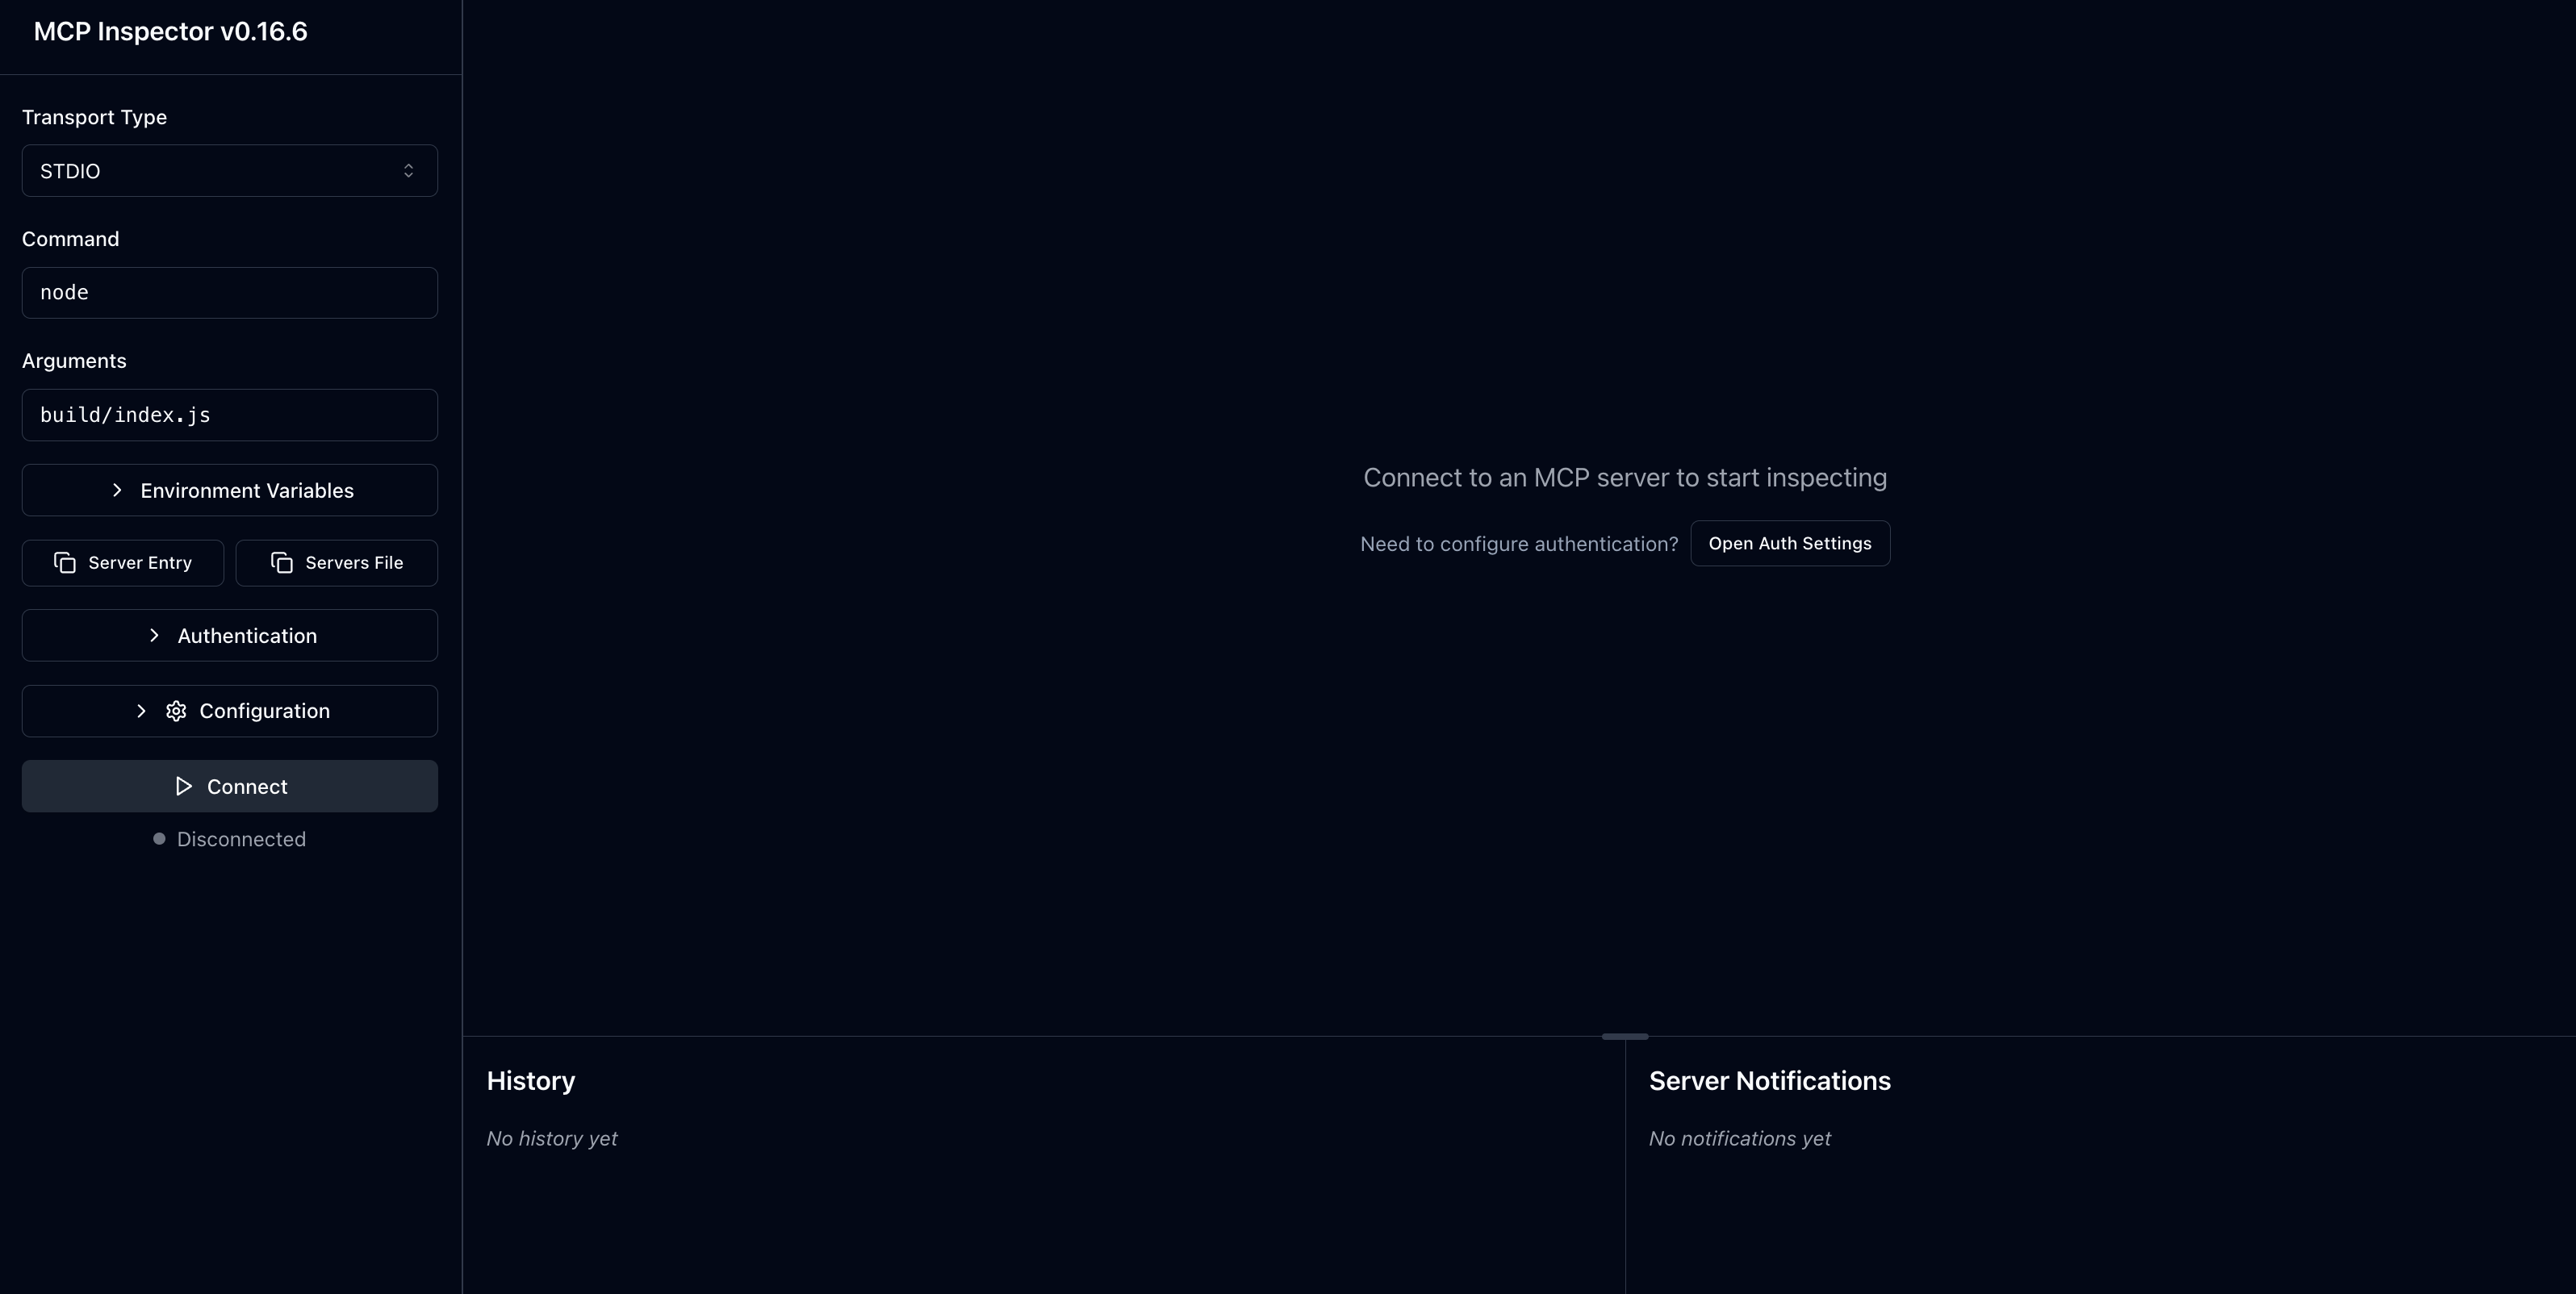

### Build remote MCP ###

In [1]:
# install dependencies
! pip install arxiv 
! pip install  dotenv
! pip install mcp

In [2]:
import arxiv
import json
import os
from typing import List
from dotenv import load_dotenv

In [3]:
PAPER_DIR = "papers"

In [4]:
def search_papers(topic: str, max_results: int = 5) -> List[str]:
    """
    Search for papers on arXiv based on a topic and store their information.
    
    Args:
        topic: The topic to search for
        max_results: Maximum number of results to retrieve (default: 5)
        
    Returns:
        List of paper IDs found in the search
    """
    
    # Use arxiv to find the papers 
    client = arxiv.Client()

    # Search for the most relevant articles matching the queried topic
    search = arxiv.Search(
        query = topic,
        max_results = max_results,
        sort_by = arxiv.SortCriterion.Relevance
    )

    papers = client.results(search)
    
    # Create directory for this topic
    path = os.path.join(PAPER_DIR, topic.lower().replace(" ", "_"))
    os.makedirs(path, exist_ok=True)
    
    file_path = os.path.join(path, "papers_info.json")

    # Try to load existing papers info
    try:
        with open(file_path, "r") as json_file:
            papers_info = json.load(json_file)
    except (FileNotFoundError, json.JSONDecodeError):
        papers_info = {}

    # Process each paper and add to papers_info  
    paper_ids = []
    for paper in papers:
        paper_ids.append(paper.get_short_id())
        paper_info = {
            'title': paper.title,
            'authors': [author.name for author in paper.authors],
            'summary': paper.summary,
            'pdf_url': paper.pdf_url,
            'published': str(paper.published.date())
        }
        papers_info[paper.get_short_id()] = paper_info
    
    # Save updated papers_info to json file
    with open(file_path, "w") as json_file:
        json.dump(papers_info, json_file, indent=2)
    
    print(f"Results are saved in: {file_path}")
    
    return paper_ids

In [5]:
search_papers("deep potential molecular dynamics")

Results are saved in: papers/deep_potential_molecular_dynamics/papers_info.json


['2305.19516v1',
 '1712.03641v2',
 '2012.05226v1',
 '2507.17032v1',
 '1912.05044v1']

In [6]:
def extract_info(paper_id: str) -> str:
    """
    Search for information about a specific paper across all topic directories.
    
    Args:
        paper_id: The ID of the paper to look for
        
    Returns:
        JSON string with paper information if found, error message if not found
    """
 
    for item in os.listdir(PAPER_DIR):
        item_path = os.path.join(PAPER_DIR, item)
        if os.path.isdir(item_path):
            file_path = os.path.join(item_path, "papers_info.json")
            if os.path.isfile(file_path):
                try:
                    with open(file_path, "r") as json_file:
                        papers_info = json.load(json_file)
                        if paper_id in papers_info:
                            return json.dumps(papers_info[paper_id], indent=2)
                except (FileNotFoundError, json.JSONDecodeError) as e:
                    print(f"Error reading {file_path}: {str(e)}")
                    continue
    
    return f"There's no saved information related to paper {paper_id}."

In [7]:
extract_info('2305.19516v1')

'{\n  "title": "Deep learning inter-atomic potential for irradiation damage in 3C-SiC",\n  "authors": [\n    "Yong Liu",\n    "Hao Wang",\n    "Linxin Guo",\n    "Zhanfeng Yan",\n    "Jian Zheng",\n    "Wei Zhou",\n    "Jianming Xue"\n  ],\n  "summary": "We developed and validated an accurate inter-atomic potential for molecular\\ndynamics simulation in cubic silicon carbide (3C-SiC) using a deep learning\\nframework combined with smooth Ziegler-Biersack-Littmark (ZBL) screened nuclear\\nrepulsion potential interpolation. Comparisons of multiple important properties\\nwere made between the deep-learning potential and existing analytical\\npotentials which are most commonly used in molecular dynamics simulations of\\n3C-SiC. Not only for equilibrium properties but also for significant properties\\nof radiation damage such as defect formation energies and threshold\\ndisplacement energies, our deep-learning potential gave closer predictions to\\nDFT criterion than analytical potentials. 

In [ ]:
#! git clone https://github.com/deepmodeling/AI4S-agent-tools.git;
! python AI4S-agent-tools/servers/Paper_Search/server.py

### Build a local Agent ###

In [14]:
! git clone https://github.com/deepmodeling/build-your-agent;


! pip install litellm 

! pip install google-adk 
!pip install --force-reinstall google-adk


  Using cached google_adk-1.14.0-py3-none-any.whl.metadata (11 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached absolufy_imports-0.3.1-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached anyio-4.10.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached authlib-1.6.3-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached fastapi-0.116.1-py3-none-any.whl.metadata (28 kB)
  Using cached google_api_python_client-2.181.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached google_cloud_aiplatform-1.112.0-py2.py3-none-any.whl.metadata (40 kB)
  Using cached google_cloud_bigtable-2.32.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached google_cloud_secret_manager-2.24.0-py3-none-any.whl.metadata (9.7 kB)
  Using cached google_cloud_spanner-3.57.0-py3-none-any.whl.metadata (11 kB)
  Using cached google_cloud_speech-2.33.0-py3-none-any.whl.metadata (9.6 kB)
  Using cached google_cloud_stor

In [ ]:
!cd ./build-your-agent/agents && adk web

/usr/local/homebrew/anaconda3/lib/python3.11/site-packages/google/adk/cli/fast_api.py:175: UserWarning: [EXPERIMENTAL] InMemoryCredentialService: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  credential_service = InMemoryCredentialService()
/usr/local/homebrew/anaconda3/lib/python3.11/site-packages/google/adk/auth/credential_service/in_memory_credential_service.py:33: UserWarning: [EXPERIMENTAL] BaseCredentialService: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  super().__init__()
INFO:     Started server process [58089]
INFO:     Waiting for application startup.

+-----------------------------------------------------------------------------+
| ADK Web Server started                                                      |
|                                                                           

DPA_Agent          adk_ui_starter     paper_search_demo
SRAgent            dpa_calculator     thermoelectric_mcp


In [14]:
!adk web

/usr/local/homebrew/anaconda3/envs/agent-mcp/lib/python3.12/site-packages/google/adk/cli/fast_api.py:175: UserWarning: [EXPERIMENTAL] InMemoryCredentialService: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  credential_service = InMemoryCredentialService()
/usr/local/homebrew/anaconda3/envs/agent-mcp/lib/python3.12/site-packages/google/adk/auth/credential_service/in_memory_credential_service.py:33: UserWarning: [EXPERIMENTAL] BaseCredentialService: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  super().__init__()
INFO:     Started server process [57542]
INFO:     Waiting for application startup.

+-----------------------------------------------------------------------------+
| ADK Web Server started                                                      |
|                                             